Coursework 3, leaky integrate and fire neurons

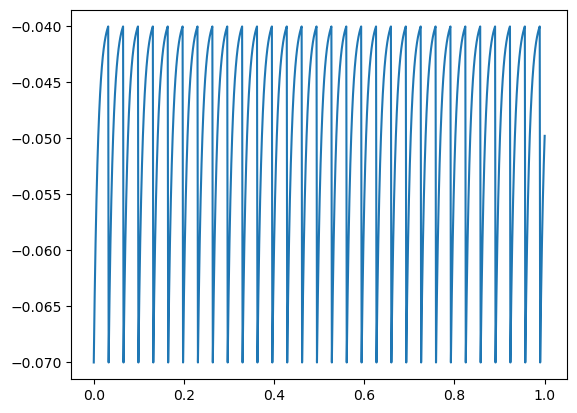

In [1]:
import matplotlib.pyplot as plt

m = 10 ** -3    # milli prefix
M = 10 ** 6     # mega prefix
n = 10 ** -9    # nano prefix

tau = 10 * m    # time constant
vThreshold = -40 * m  # voltage threshold spikes occur at
E = -70 * m     # leak potential
R = 10 * M      # membrane resistance
vReset = -70 * m      # reset voltage
I = 3.1 * n     # electode (/synaptic) input current
# for extended coursework I = I(t)

def dv_dt(v, t):
    return (E - v + R * I) / tau

def Euler(v, h, f, t):
    # v: most recent value of voltage calulated
    # h: time width to approximate over
    # f: function where dv/dt = f(t, y)
    # t: most recent time voltage was calculated at
    return v + h * f(v, t)

# setting up the euler process
V = [vReset]
t = [0]
h = 1 * m     # 1ms Delta t
VTemp = 0

while t[-1] < 1:
    VTemp = Euler(V[-1], h, dv_dt, t[-1])
    if VTemp < vThreshold:
        V.append(VTemp)
    elif VTemp >= vThreshold:
        V.append(vReset)
    t.append(t[-1]+h)

fig, ax = plt.subplots()
ax.plot(t, V)

Question 2
Inter-synapse conectivity

$\tau_m \dot v = E_L - v + R_m * i(t)$

where $i(t) = I_e + i_s(t)$

if $i_s(t) = \bar g_s * s(t) * (E_s - v)$ where $s(t) = e^{-\frac{t}{\tau_s}}$

$\tau_m \dot v = E_L - v + R_m * I_e + R_m * \bar g_s * e^{-\frac{t}{\tau_s}}*(E_s-v)$


<function <lambda> at 0x000002AD30DDC680>


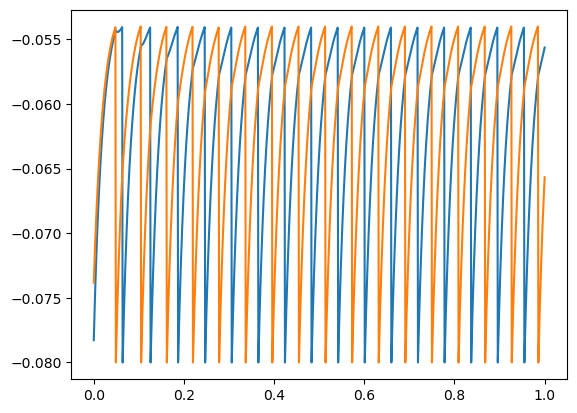

In [23]:
from math import e
from random import uniform

h = 1 * m

tau = 20 * m    # time constant
vThreshold = -54 * m  # voltage threshold spikes occur at
El = -70 * m     # leak potential
R = 10 * M      # membrane resistance
vReset = -80 * m      # reset voltage
Ie = 1.8 * n     # electode (/synaptic) input current

p = 0.5
tauS = 10 * m
Rg = 0.15

Es = -80 * m

# Rm is moved into It function to prevent floating point errors
It = lambda v, t, s: R * Ie + Rg * s * (Es - v)

s = lambda t: e ** (-t/tauS)

dv_dt = lambda v, t, s: (El - v + It(v, t, s)) / tau


# euler approx. to V and s
EulerDv = lambda v, h, f, t, s: v + h * f(v, t, s)

V0 = [uniform(vReset, vThreshold)]
V1 = [uniform(vReset, vThreshold)]
t = [0]
# s* is last time the neuron fired
s0 = 0
s1 = 0

sDummy = [0]

print(s)
while t[-1] < 1:
    sDummy.append(s(t[-1]-s0))
    # calculate voltage of the neurons, value may change if there is a spike
    VTemp0 = EulerDv(V0[-1], h, dv_dt, t[-1], s(t[-1]-s1))
    VTemp1 = EulerDv(V1[-1], h, dv_dt, t[-1], s(t[-1]-s0))

    if VTemp0 < vThreshold:
        V0.append(VTemp0)
    elif VTemp0 >= vThreshold:
        V0.append(vReset)
        s0 = t[-1]

    if VTemp1 < vThreshold:
        V1.append(VTemp1)
    elif VTemp1 >= vThreshold:
        V1.append(vReset)
        s1 = t[-1]
    t.append(t[-1]+h)

fig, ax = plt.subplots()
ax.plot(t, V0)
ax.plot(t, V1)
# ax.plot(t, sDummy)